# **Imports / Read Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pprint import pprint

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

pd.pandas.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# **EDA**

In [3]:
numerical_cont_features = [col for col in train.drop(['Id', 'SalePrice'], axis=1) if 
                      train[col].dtype in ['int64', 'float64'] and train[col].nunique() > 15]
numerical_cat_features = [col for col in train.drop(['Id', 'SalePrice'], axis=1) if 
                      train[col].dtype in ['int64', 'float64'] and train[col].nunique() <= 15]
categorical_features = [col for col in train.drop('SalePrice', axis=1) if 
                        train[col].dtype in ['object']]
numerical_cols = numerical_cont_features + numerical_cat_features

In [4]:
null_cols_train = [[col, train[col].isnull().sum(), \
                    round(train[col].isnull().sum() / len(train[col]), 2)] for col in \
                   train if train[col].isnull().sum() > 0]
pprint(null_cols_train)
print(f'null_cols_train length: {len(null_cols_train)}')

[['LotFrontage', 259, 0.18],
 ['Alley', 1369, 0.94],
 ['MasVnrType', 8, 0.01],
 ['MasVnrArea', 8, 0.01],
 ['BsmtQual', 37, 0.03],
 ['BsmtCond', 37, 0.03],
 ['BsmtExposure', 38, 0.03],
 ['BsmtFinType1', 37, 0.03],
 ['BsmtFinType2', 38, 0.03],
 ['Electrical', 1, 0.0],
 ['FireplaceQu', 690, 0.47],
 ['GarageType', 81, 0.06],
 ['GarageYrBlt', 81, 0.06],
 ['GarageFinish', 81, 0.06],
 ['GarageQual', 81, 0.06],
 ['GarageCond', 81, 0.06],
 ['PoolQC', 1453, 1.0],
 ['Fence', 1179, 0.81],
 ['MiscFeature', 1406, 0.96]]
null_cols_train length: 19


In [5]:
null_cols_test = [[col, test[col].isnull().sum(), \
                    round(test[col].isnull().sum() / len(test[col]), 2)] for col in \
                   test if test[col].isnull().sum() > 0]
pprint(null_cols_test)
print(f'null_cols_test length: {len(null_cols_test)}')

[['MSZoning', 4, 0.0],
 ['LotFrontage', 227, 0.16],
 ['Alley', 1352, 0.93],
 ['Utilities', 2, 0.0],
 ['Exterior1st', 1, 0.0],
 ['Exterior2nd', 1, 0.0],
 ['MasVnrType', 16, 0.01],
 ['MasVnrArea', 15, 0.01],
 ['BsmtQual', 44, 0.03],
 ['BsmtCond', 45, 0.03],
 ['BsmtExposure', 44, 0.03],
 ['BsmtFinType1', 42, 0.03],
 ['BsmtFinSF1', 1, 0.0],
 ['BsmtFinType2', 42, 0.03],
 ['BsmtFinSF2', 1, 0.0],
 ['BsmtUnfSF', 1, 0.0],
 ['TotalBsmtSF', 1, 0.0],
 ['BsmtFullBath', 2, 0.0],
 ['BsmtHalfBath', 2, 0.0],
 ['KitchenQual', 1, 0.0],
 ['Functional', 2, 0.0],
 ['FireplaceQu', 730, 0.5],
 ['GarageType', 76, 0.05],
 ['GarageYrBlt', 78, 0.05],
 ['GarageFinish', 78, 0.05],
 ['GarageCars', 1, 0.0],
 ['GarageArea', 1, 0.0],
 ['GarageQual', 78, 0.05],
 ['GarageCond', 78, 0.05],
 ['PoolQC', 1456, 1.0],
 ['Fence', 1169, 0.8],
 ['MiscFeature', 1408, 0.97],
 ['SaleType', 1, 0.0]]
null_cols_test length: 33


In [6]:
null_cat_cols_train = [[col, train[col].isnull().sum(), \
                        round(train[col].isnull().sum() / len(train[col]), 2)] for \
                       col in train[categorical_features] if train[col].isnull().sum() > 0]
pprint(null_cat_cols_train)
print(f'null_cat_cols_train length: {len(null_cat_cols_train)}')

[['Alley', 1369, 0.94],
 ['MasVnrType', 8, 0.01],
 ['BsmtQual', 37, 0.03],
 ['BsmtCond', 37, 0.03],
 ['BsmtExposure', 38, 0.03],
 ['BsmtFinType1', 37, 0.03],
 ['BsmtFinType2', 38, 0.03],
 ['Electrical', 1, 0.0],
 ['FireplaceQu', 690, 0.47],
 ['GarageType', 81, 0.06],
 ['GarageFinish', 81, 0.06],
 ['GarageQual', 81, 0.06],
 ['GarageCond', 81, 0.06],
 ['PoolQC', 1453, 1.0],
 ['Fence', 1179, 0.81],
 ['MiscFeature', 1406, 0.96]]
null_cat_cols_train length: 16


In [7]:
null_cat_cols_test = [[col, test[col].isnull().sum(), \
                        round(test[col].isnull().sum() / len(test[col]), 2)] for \
                       col in test[categorical_features] if test[col].isnull().sum() > 0]
pprint(null_cat_cols_test)
print(f'null_cat_cols_test length: {len(null_cat_cols_test)}')

[['MSZoning', 4, 0.0],
 ['Alley', 1352, 0.93],
 ['Utilities', 2, 0.0],
 ['Exterior1st', 1, 0.0],
 ['Exterior2nd', 1, 0.0],
 ['MasVnrType', 16, 0.01],
 ['BsmtQual', 44, 0.03],
 ['BsmtCond', 45, 0.03],
 ['BsmtExposure', 44, 0.03],
 ['BsmtFinType1', 42, 0.03],
 ['BsmtFinType2', 42, 0.03],
 ['KitchenQual', 1, 0.0],
 ['Functional', 2, 0.0],
 ['FireplaceQu', 730, 0.5],
 ['GarageType', 76, 0.05],
 ['GarageFinish', 78, 0.05],
 ['GarageQual', 78, 0.05],
 ['GarageCond', 78, 0.05],
 ['PoolQC', 1456, 1.0],
 ['Fence', 1169, 0.8],
 ['MiscFeature', 1408, 0.97],
 ['SaleType', 1, 0.0]]
null_cat_cols_test length: 22


In [8]:
null_num_cols_train = [[col, train[col].isnull().sum(), \
                        round(train[col].isnull().sum() / len(train[col]), 2)] for \
                       col in train[numerical_cols] if train[col].isnull().sum() > 0]
pprint(null_num_cols_train)
print(f'null_num_cols_train length: {len(null_num_cols_train)}')

[['LotFrontage', 259, 0.18], ['MasVnrArea', 8, 0.01], ['GarageYrBlt', 81, 0.06]]
null_num_cols_train length: 3


In [9]:
null_num_cols_test = [[col, test[col].isnull().sum(), \
                        round(test[col].isnull().sum() / len(test[col]), 2)] for \
                       col in test[numerical_cols] if test[col].isnull().sum() > 0]
pprint(null_num_cols_test)
print(f'null_num_cols_test length: {len(null_num_cols_test)}')

[['LotFrontage', 227, 0.16],
 ['MasVnrArea', 15, 0.01],
 ['BsmtFinSF1', 1, 0.0],
 ['BsmtFinSF2', 1, 0.0],
 ['BsmtUnfSF', 1, 0.0],
 ['TotalBsmtSF', 1, 0.0],
 ['GarageYrBlt', 78, 0.05],
 ['GarageArea', 1, 0.0],
 ['BsmtFullBath', 2, 0.0],
 ['BsmtHalfBath', 2, 0.0],
 ['GarageCars', 1, 0.0]]
null_num_cols_test length: 11


In [10]:
sns.set_style('whitegrid')

<ipython-input-11-ed337a0eae73>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 4))


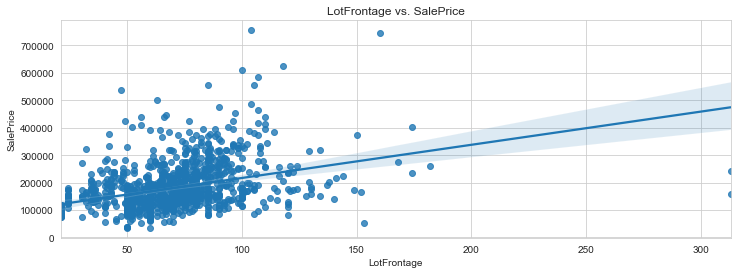

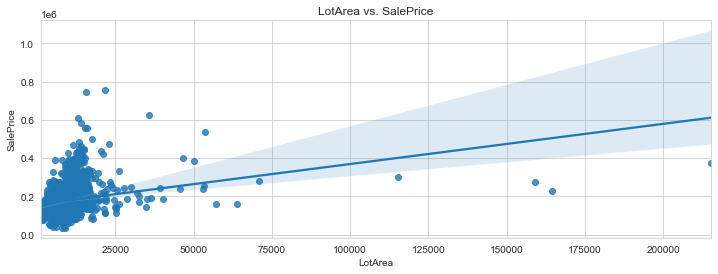

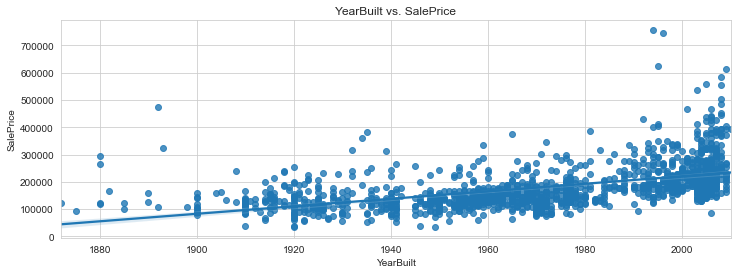

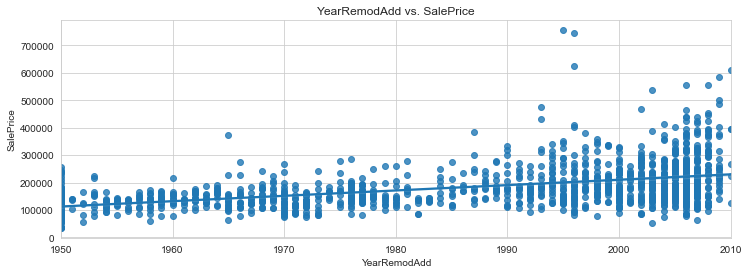

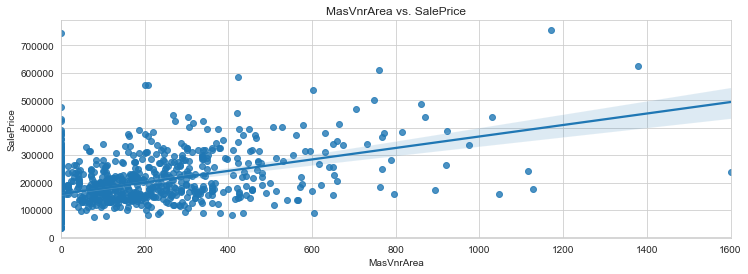

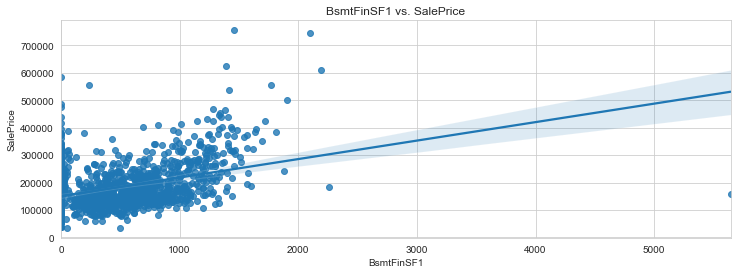

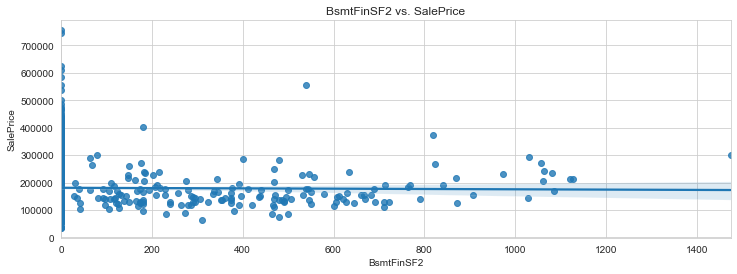

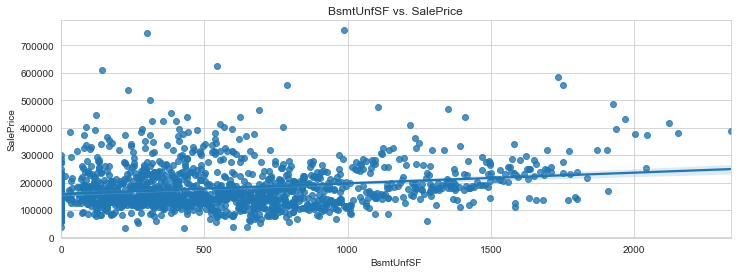

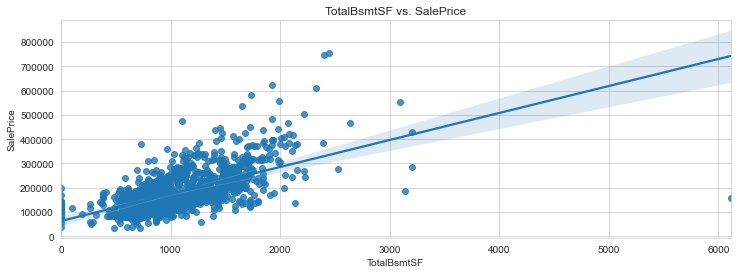

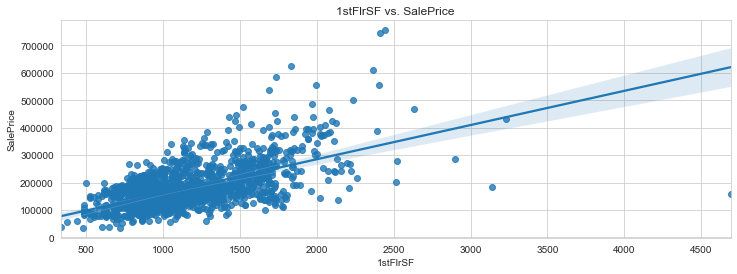

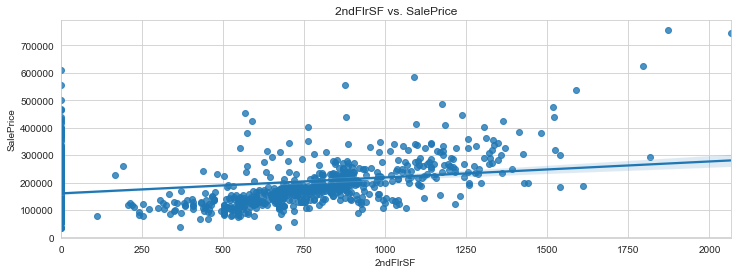

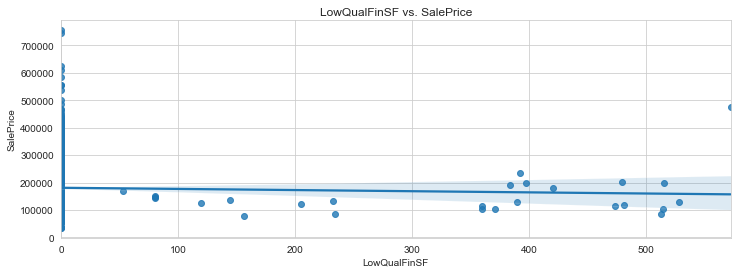

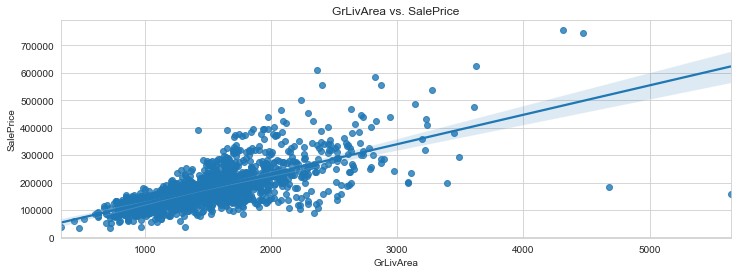

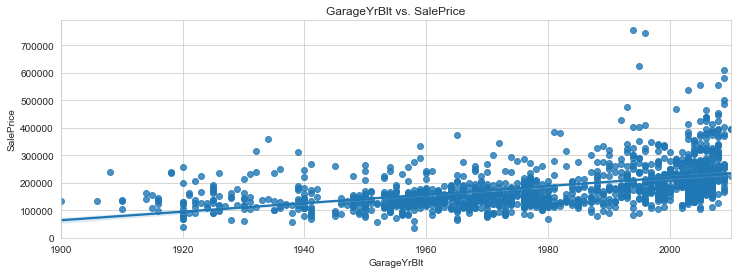

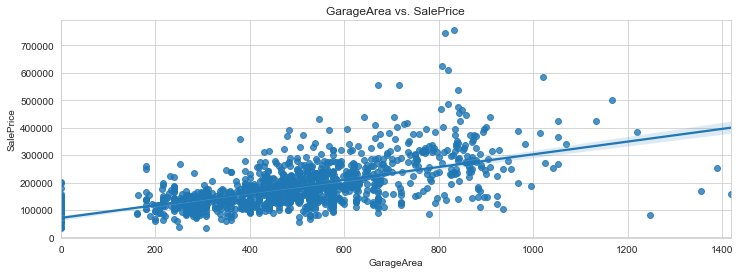

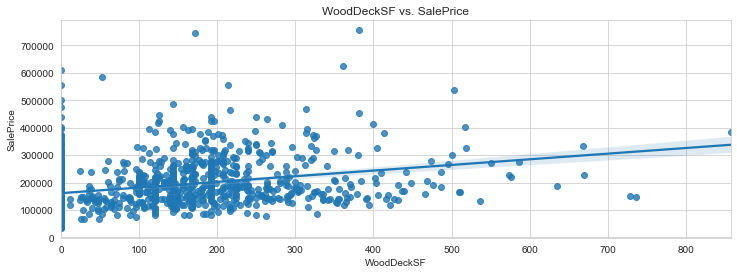

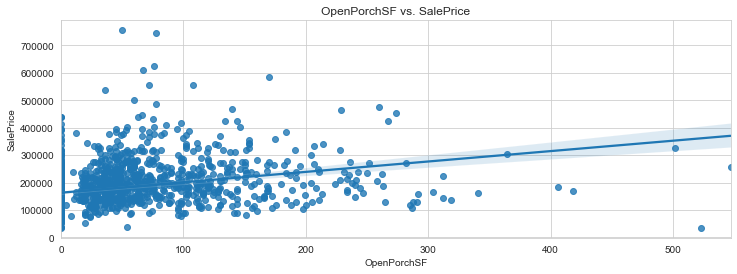

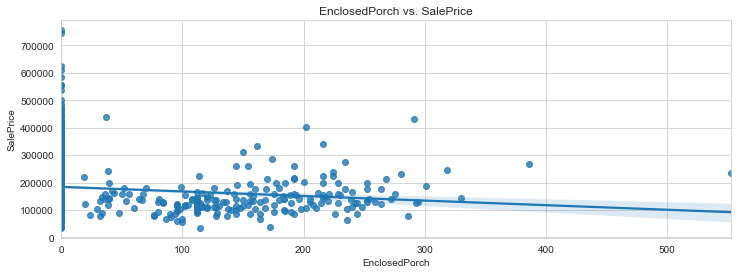

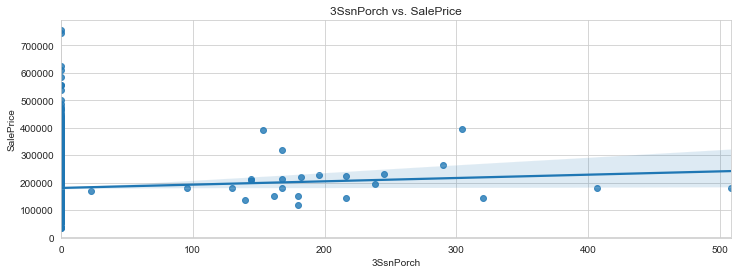

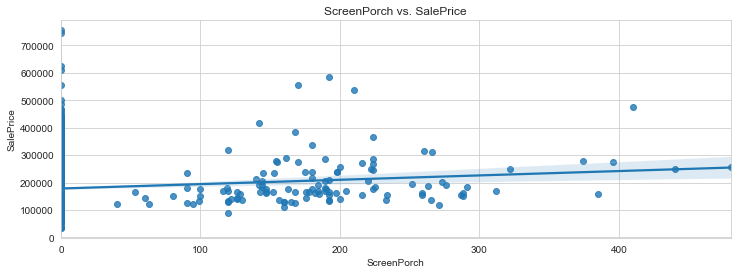

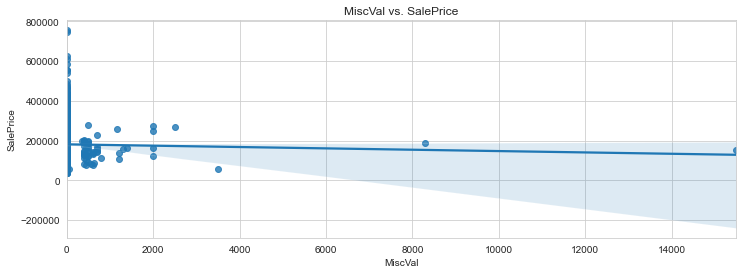

In [11]:
for ax in train[numerical_cont_features]:
    plt.figure(figsize=(12, 4))
    sns.regplot(x=train[ax], y=train['SalePrice'])
    plt.title(f'{ax} vs. SalePrice')
    plt.xlabel(ax)
    plt.ylabel('SalePrice')

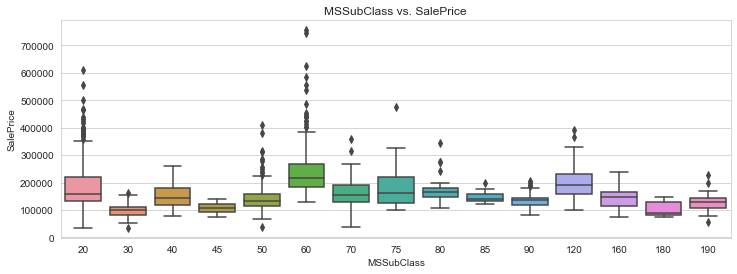

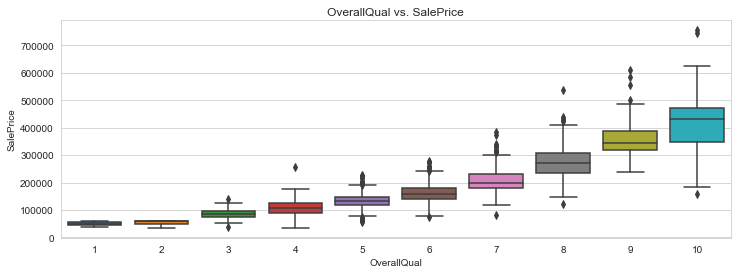

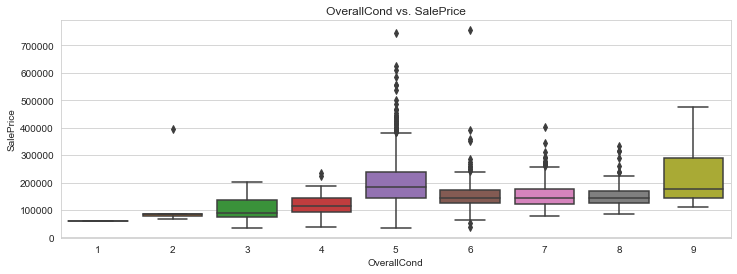

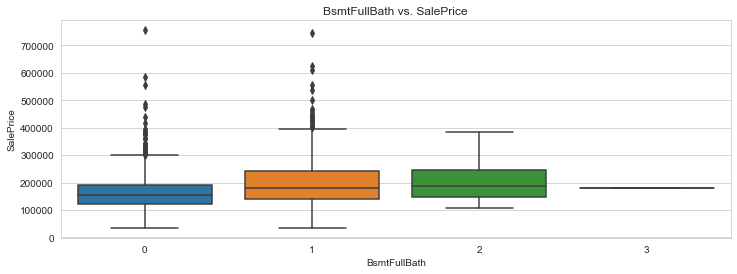

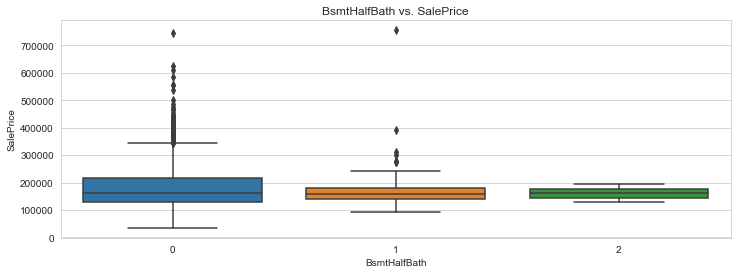

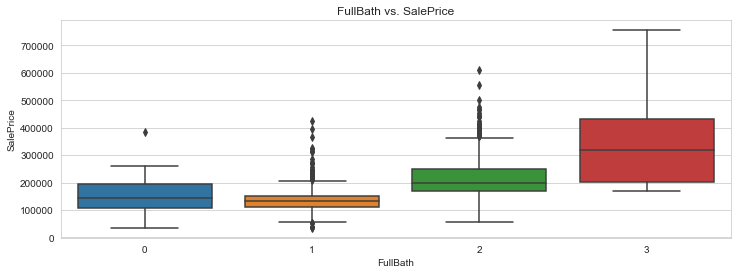

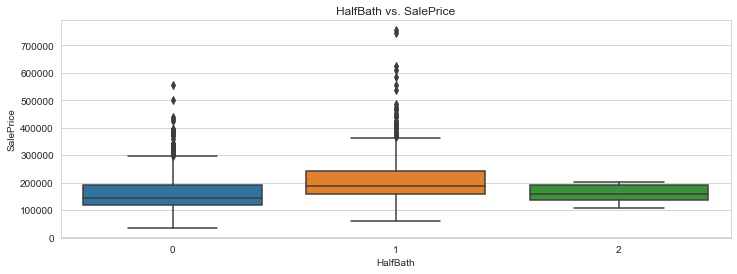

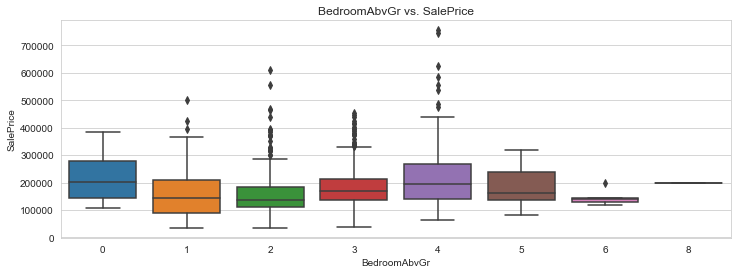

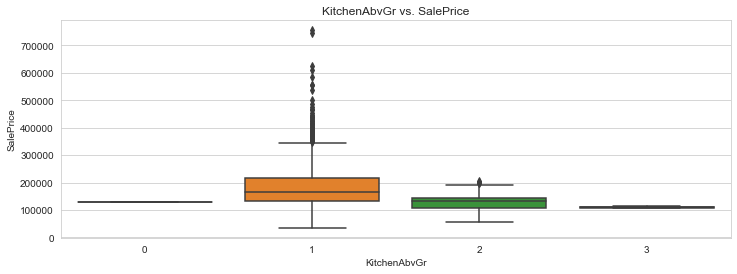

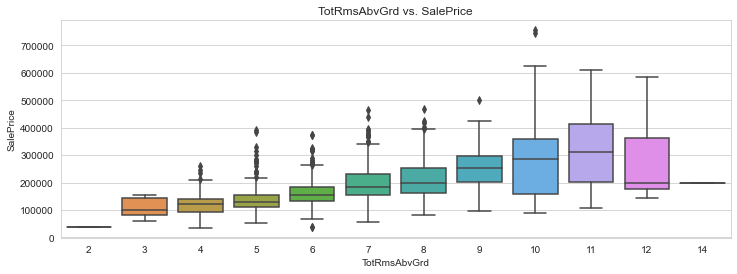

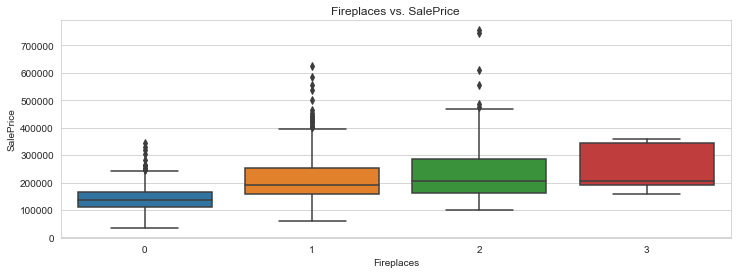

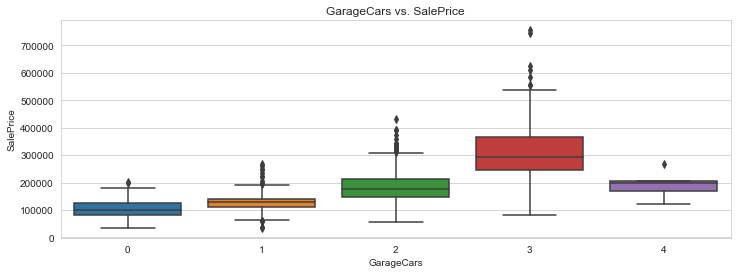

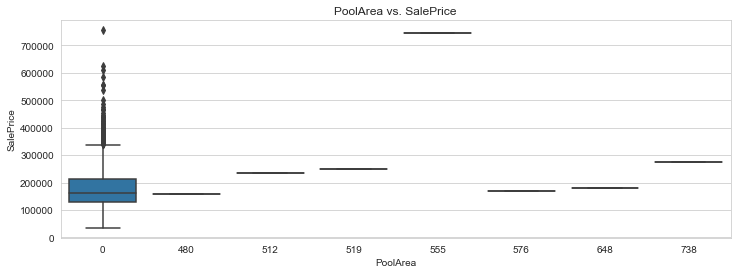

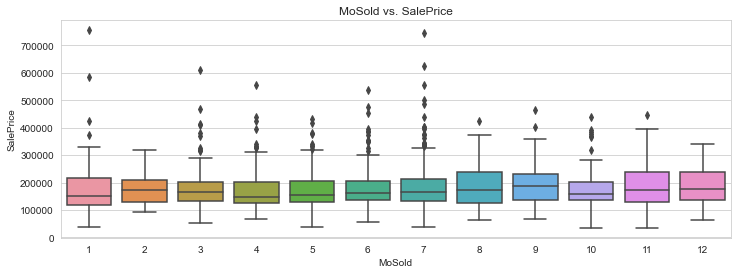

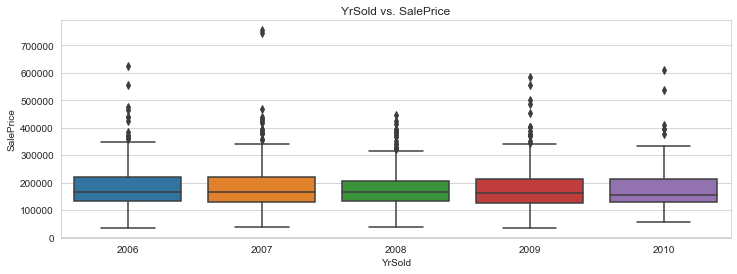

In [12]:
for ax in train[numerical_cat_features]:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=train[ax], y=train['SalePrice'])
    plt.title(f'{ax} vs. SalePrice')
    plt.xlabel(ax)
    plt.ylabel('SalePrice')

<ipython-input-13-6794b9677fd5>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 4))


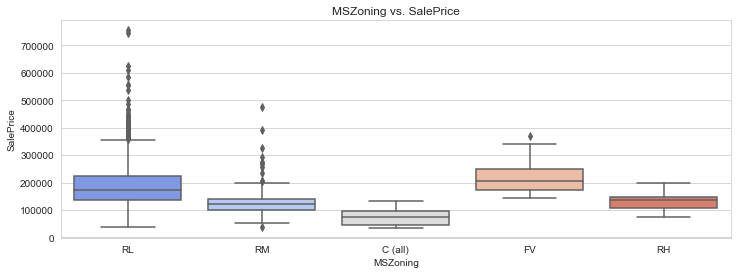

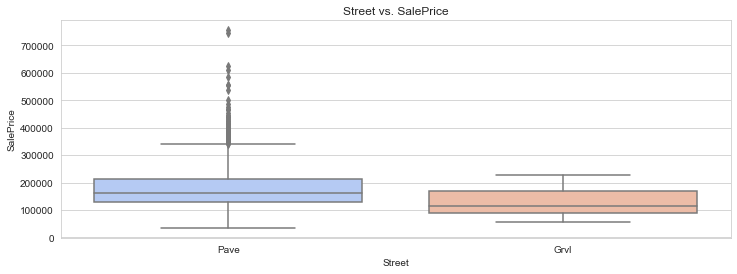

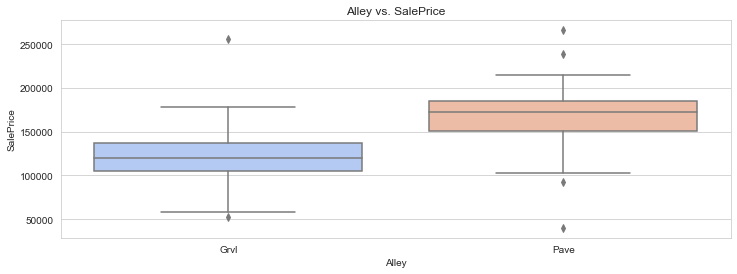

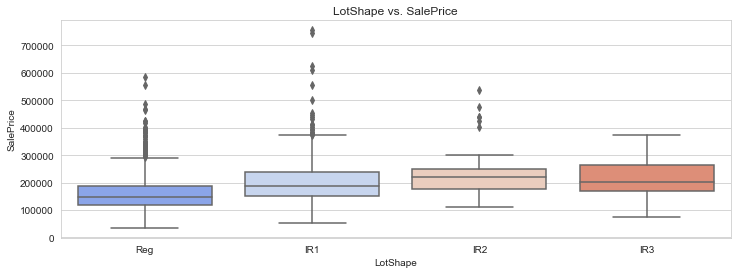

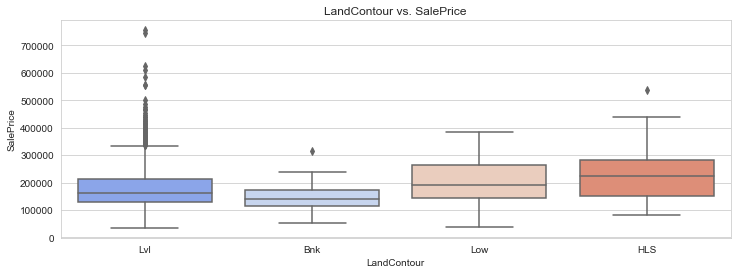

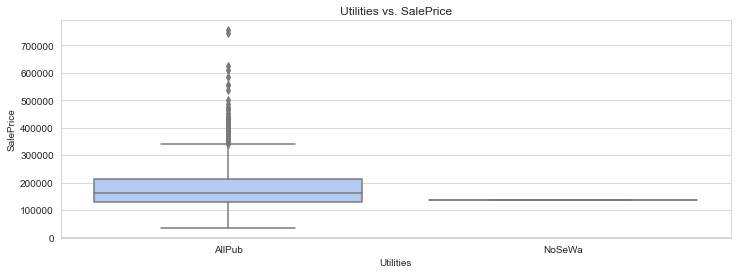

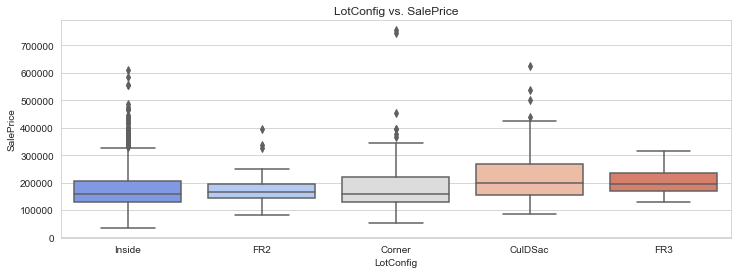

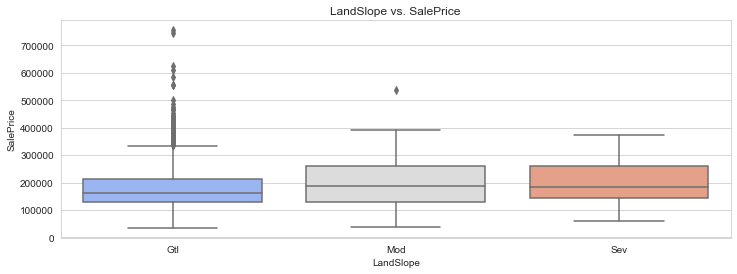

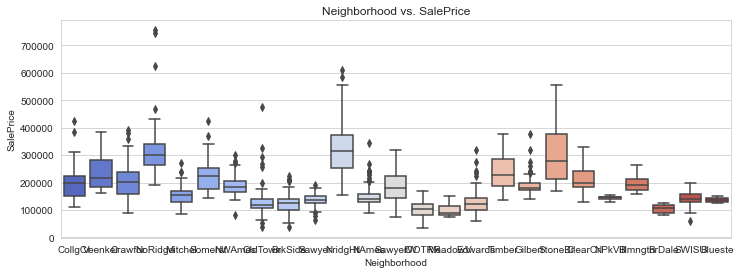

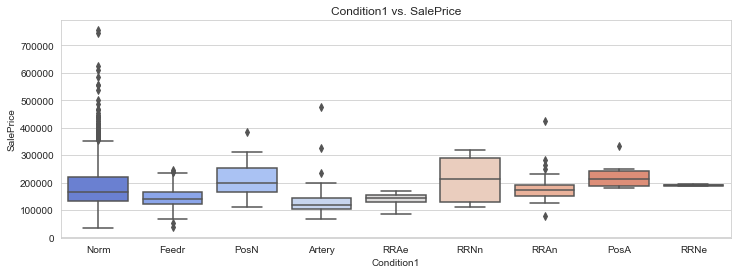

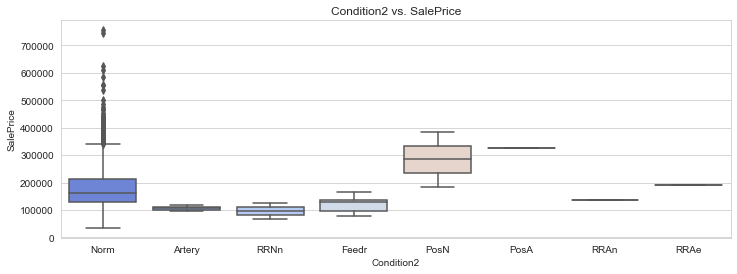

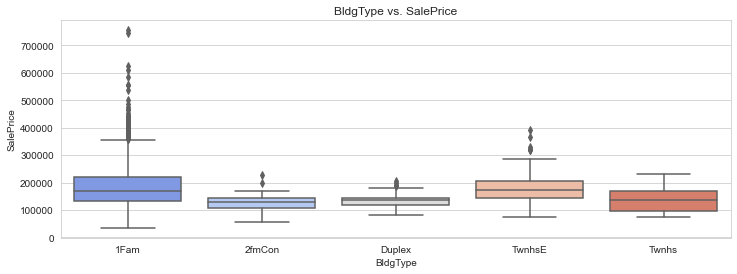

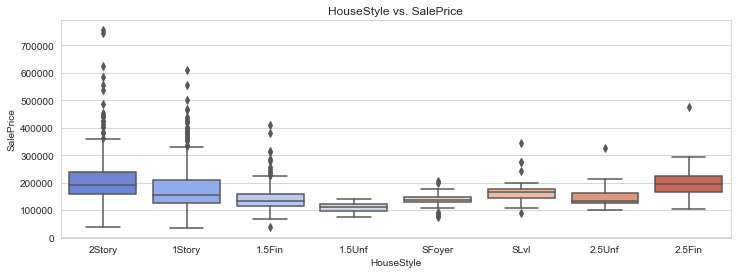

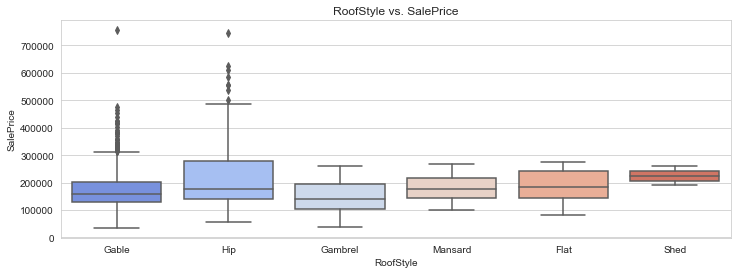

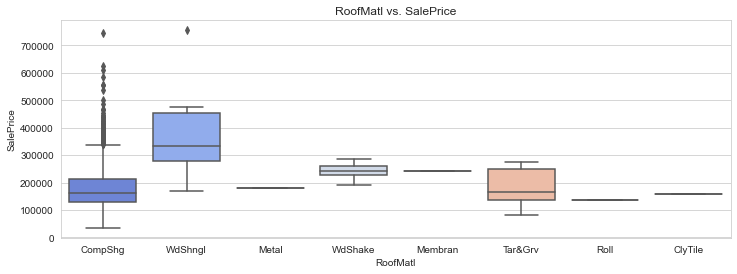

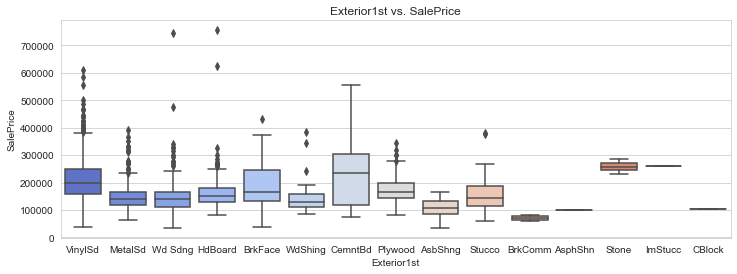

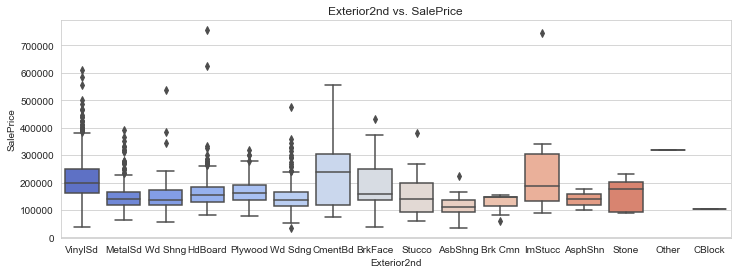

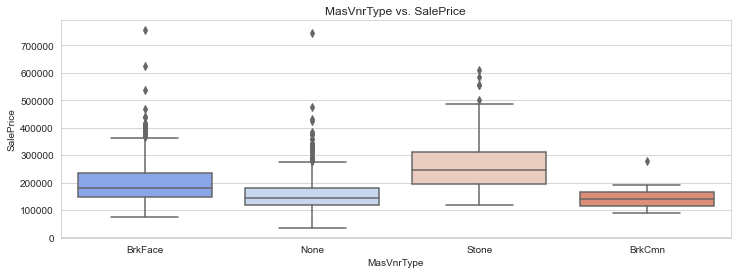

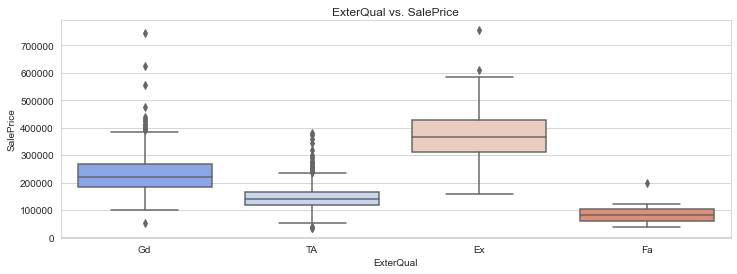

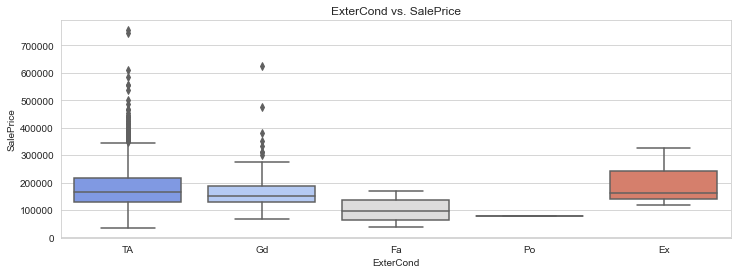

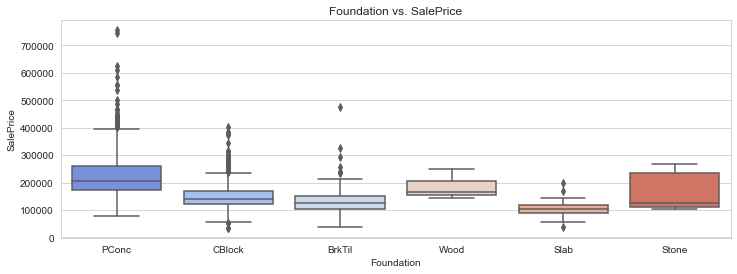

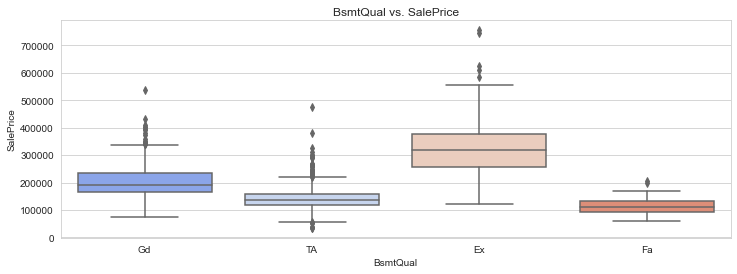

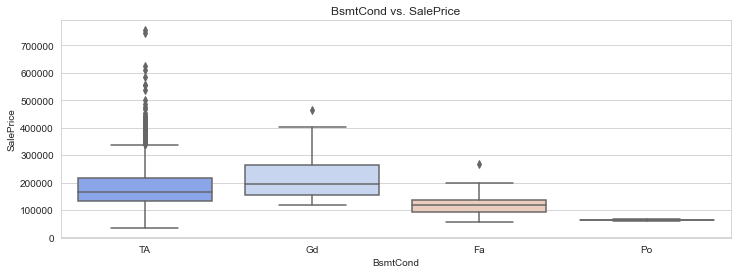

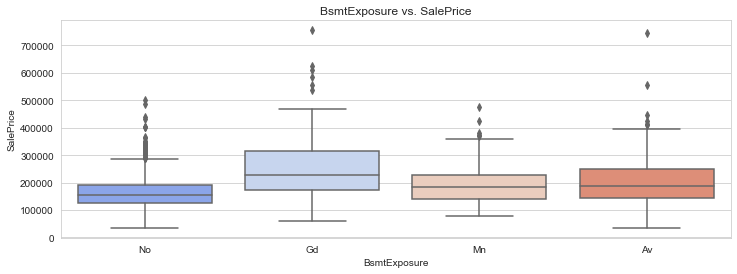

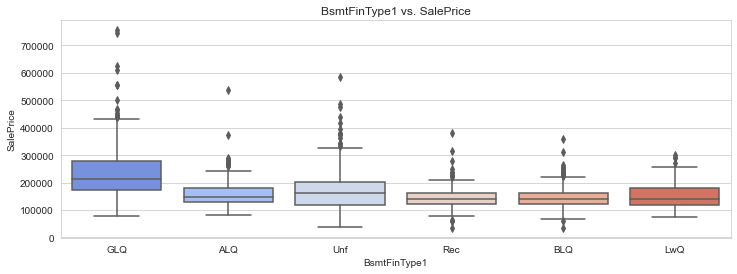

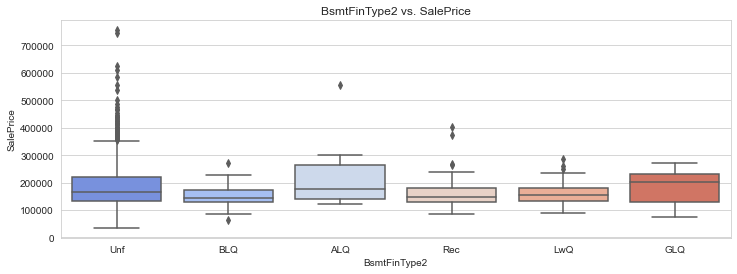

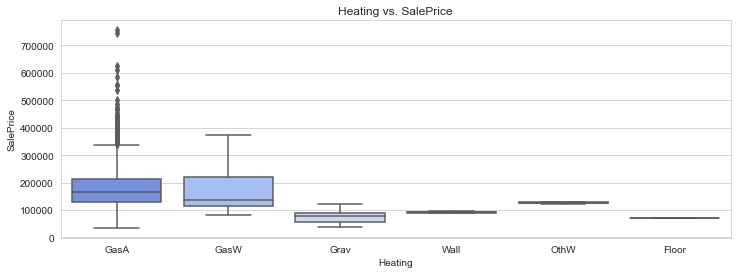

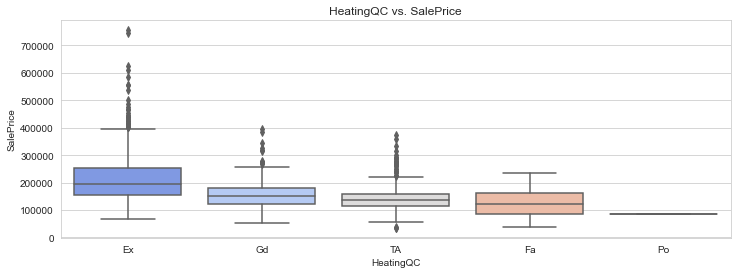

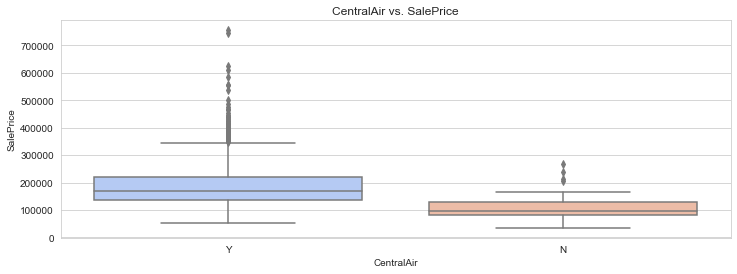

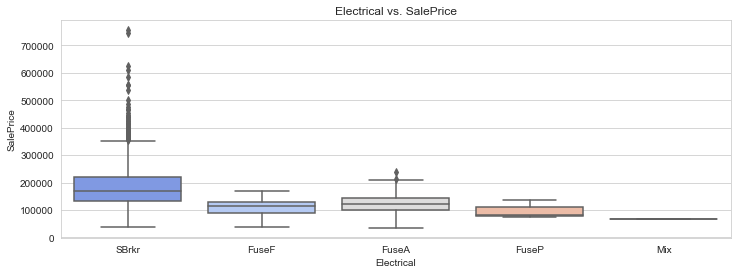

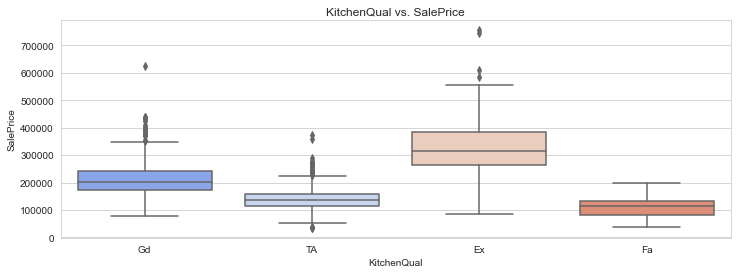

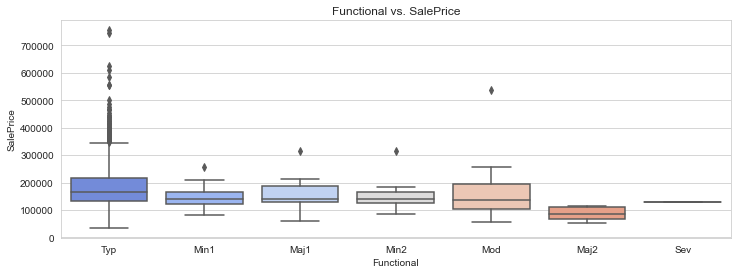

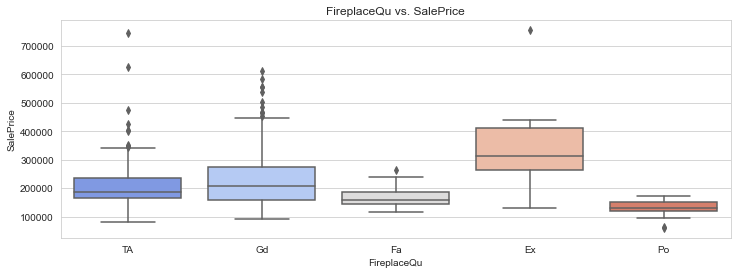

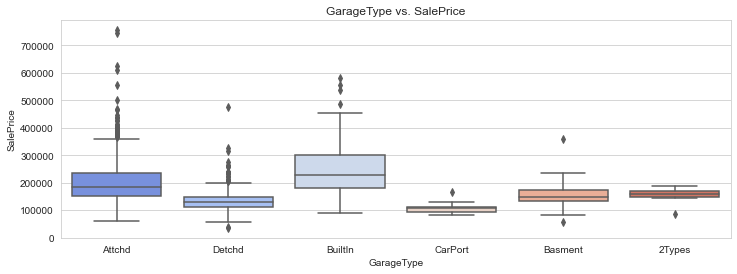

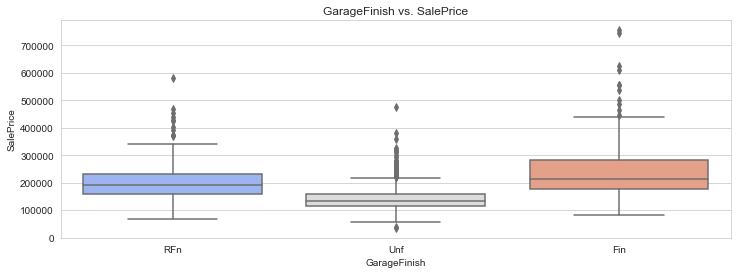

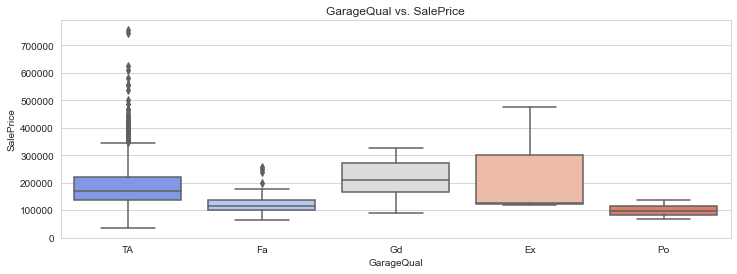

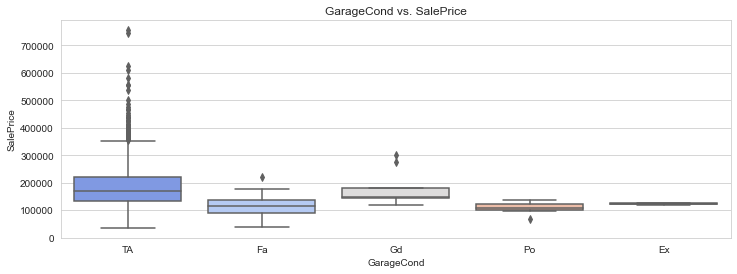

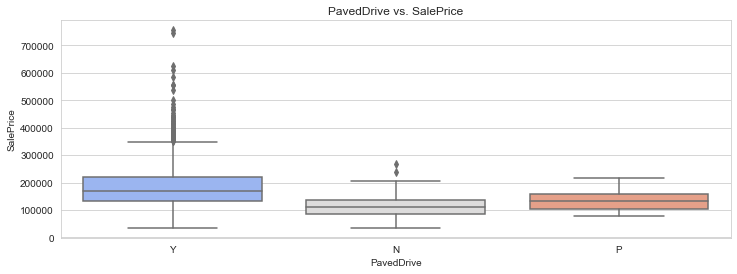

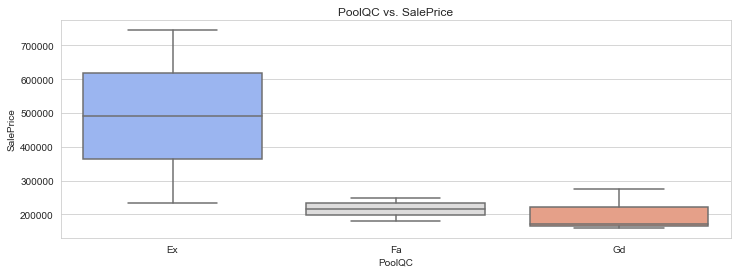

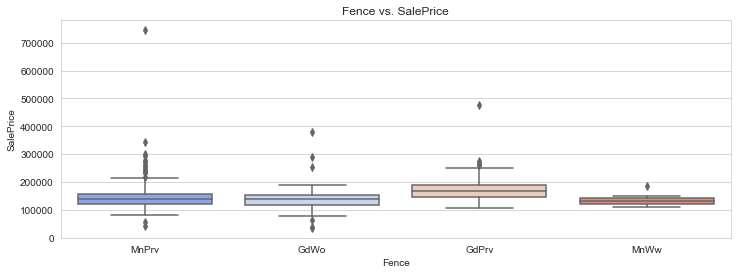

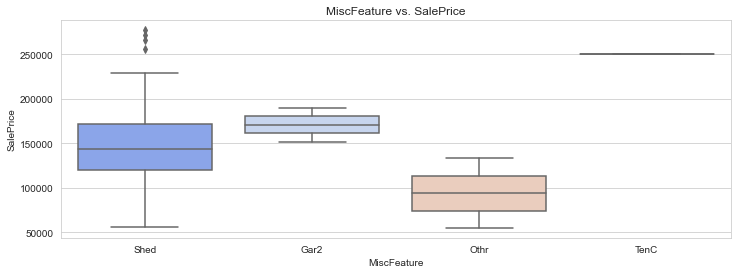

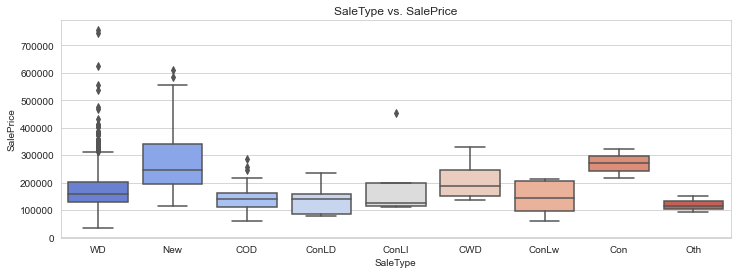

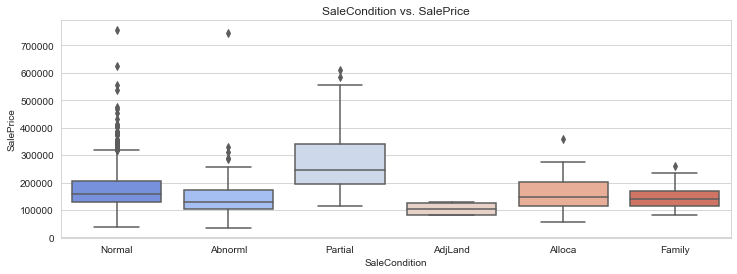

In [13]:
for ax in train[categorical_features]:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=train[ax], y=train['SalePrice'], palette='coolwarm')
    plt.title(f'{ax} vs. SalePrice')
    plt.xlabel(ax)
    plt.ylabel('SalePrice')

<ipython-input-14-a54a41e995e7>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 4))


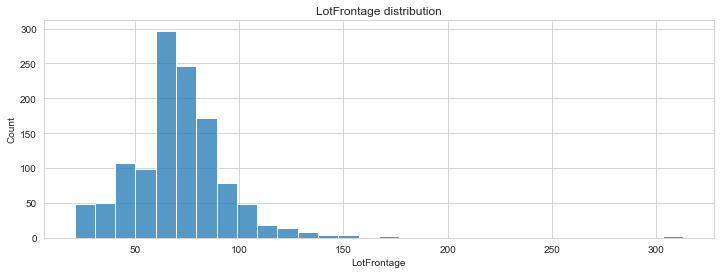

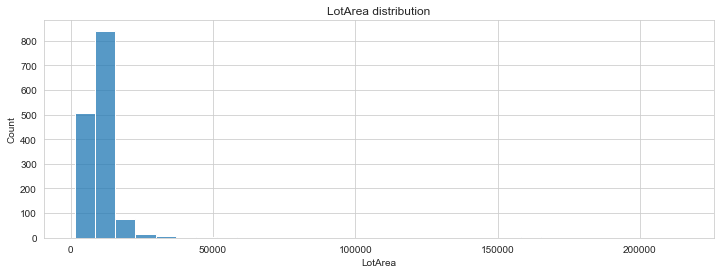

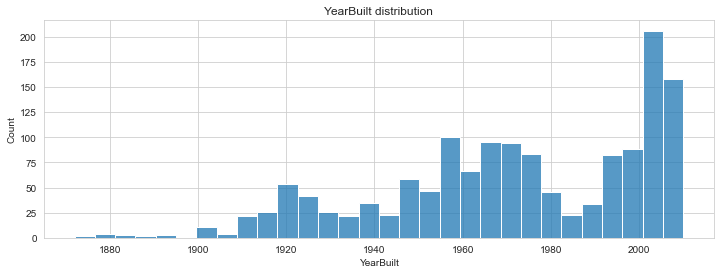

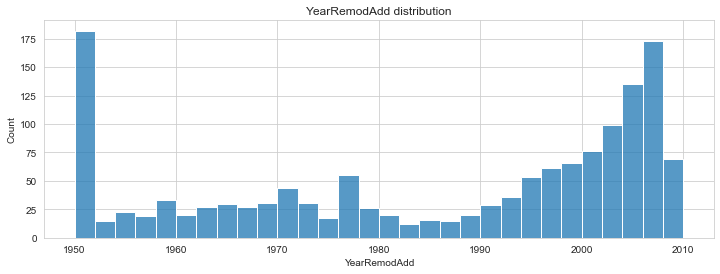

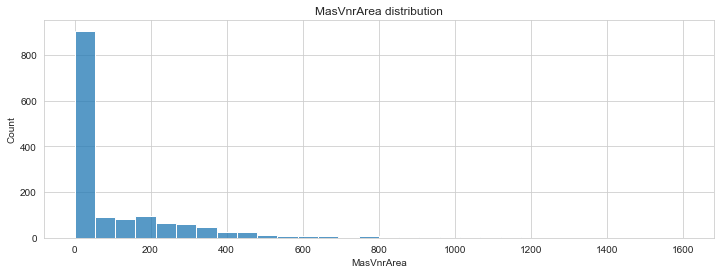

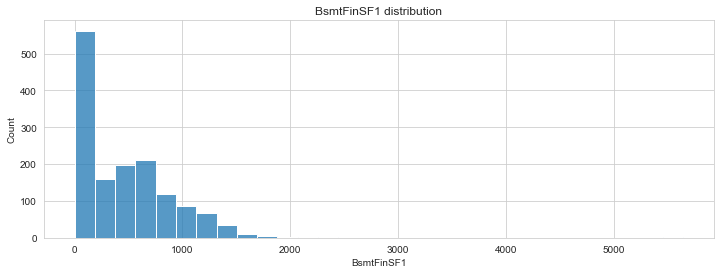

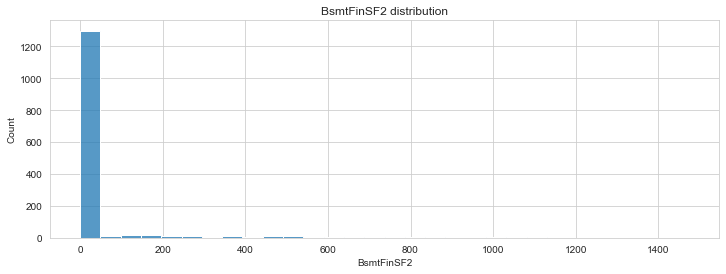

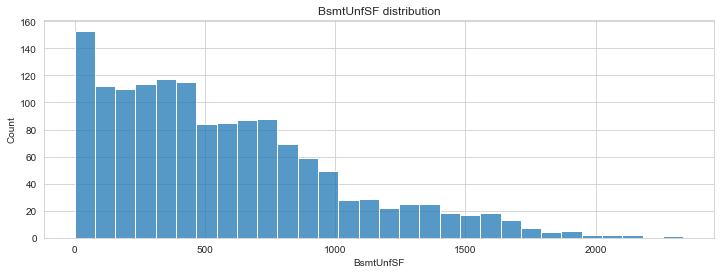

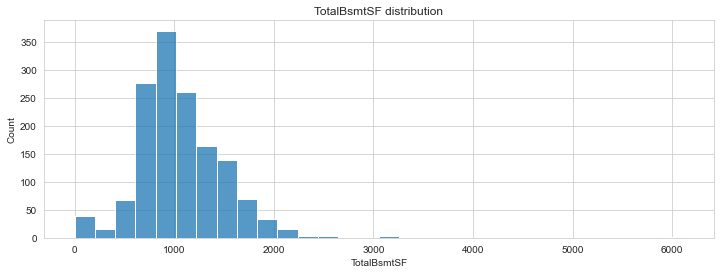

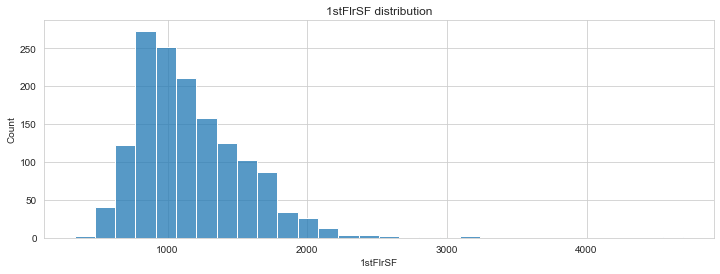

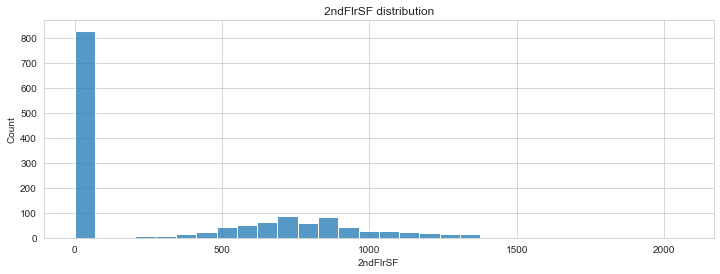

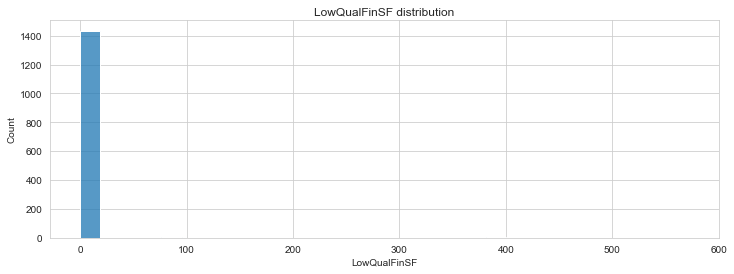

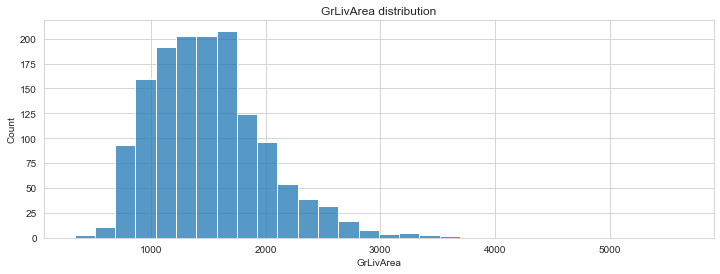

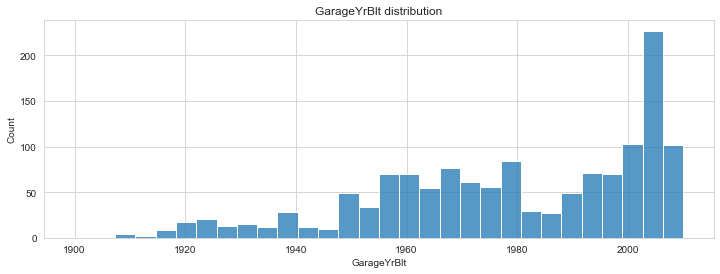

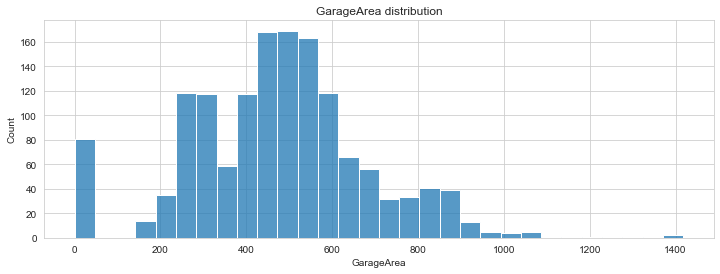

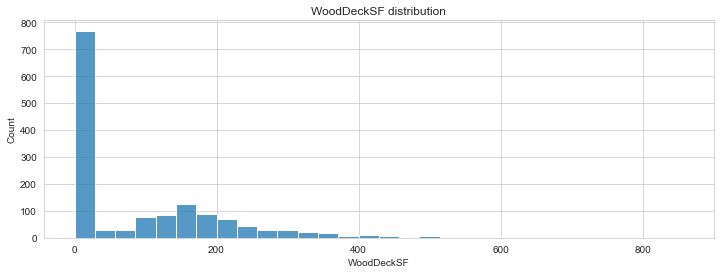

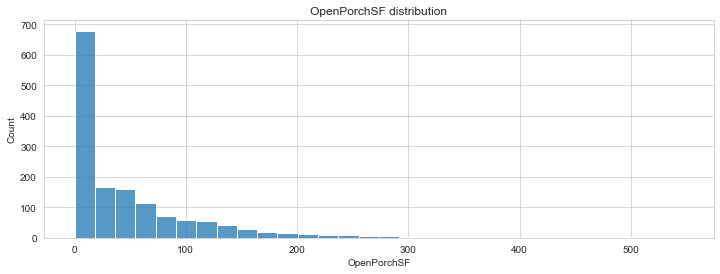

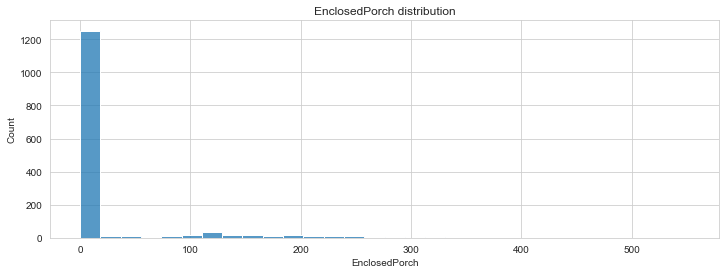

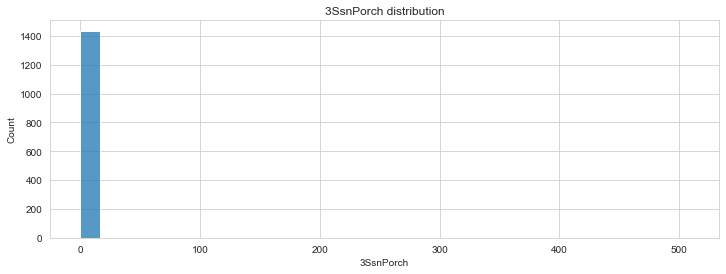

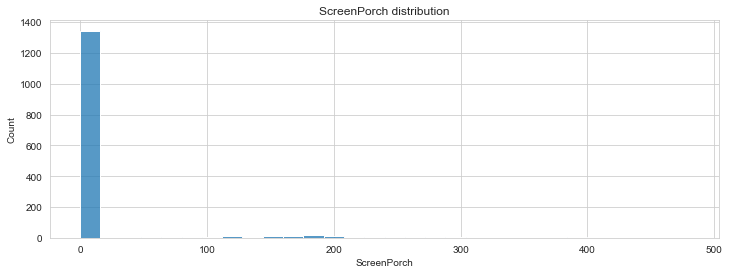

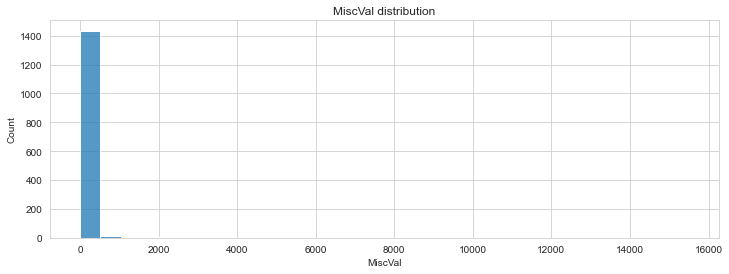

In [14]:
for ax in train[numerical_cont_features]:
    plt.figure(figsize=(12, 4))
    sns.histplot(x=train[ax], bins=30)
    plt.title(f'{ax} distribution')

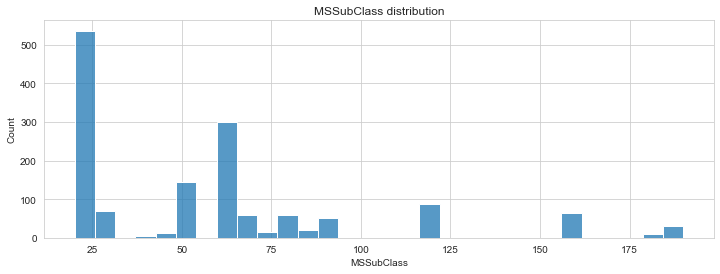

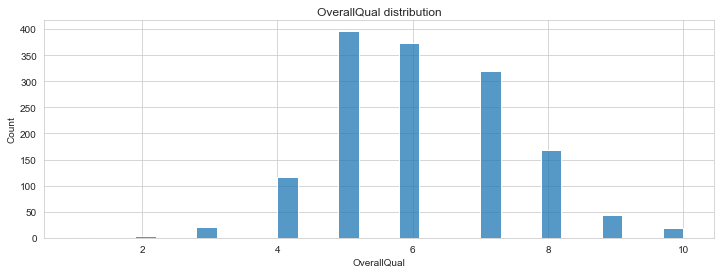

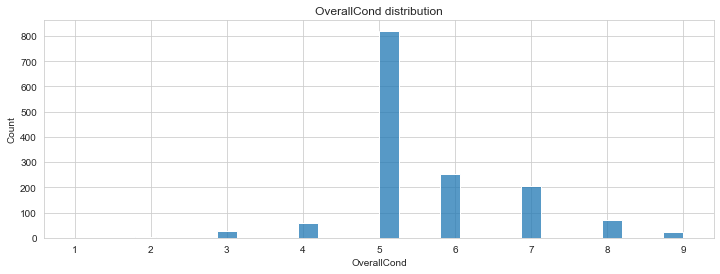

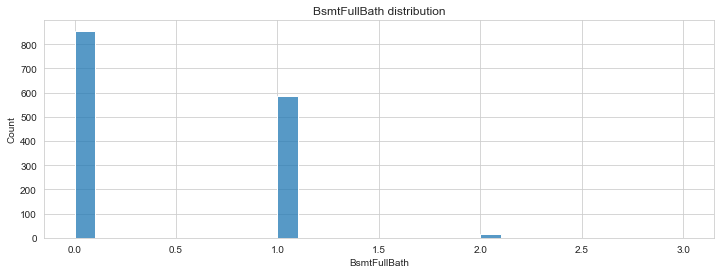

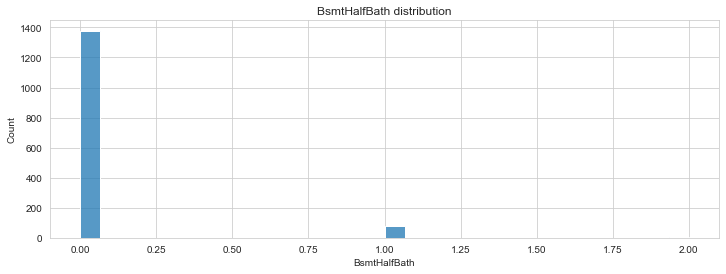

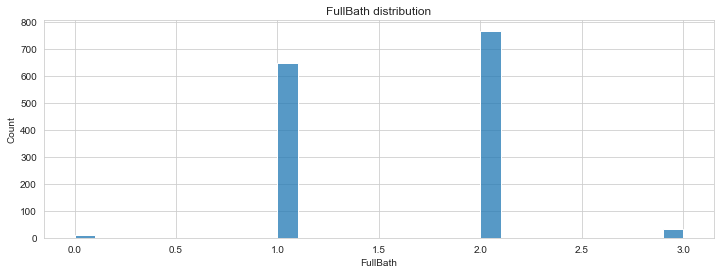

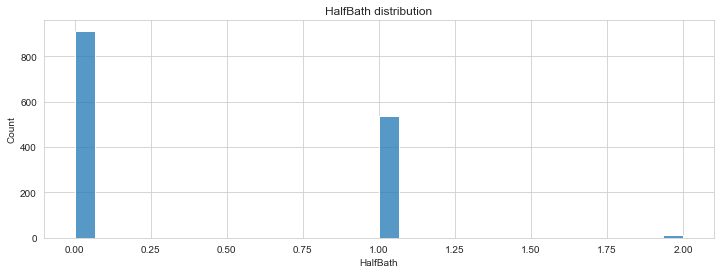

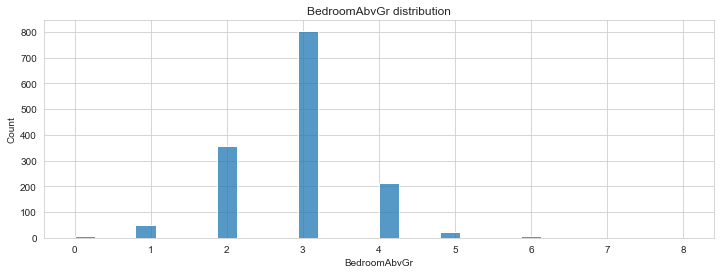

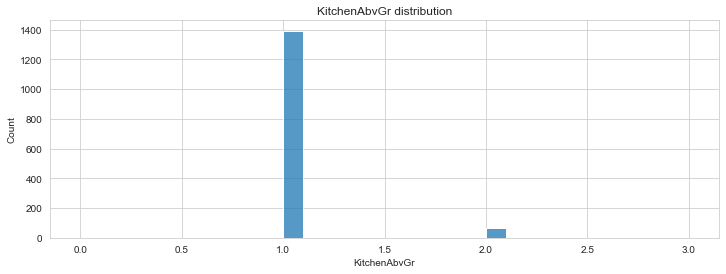

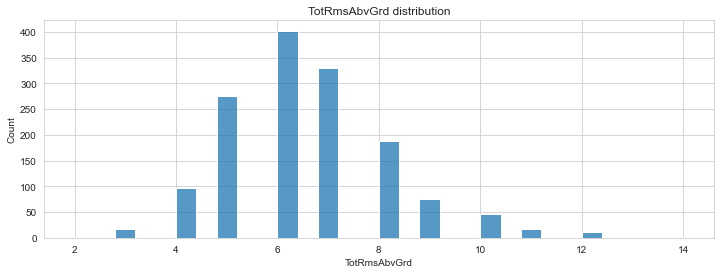

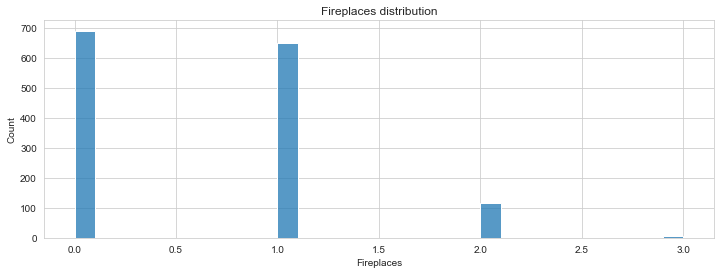

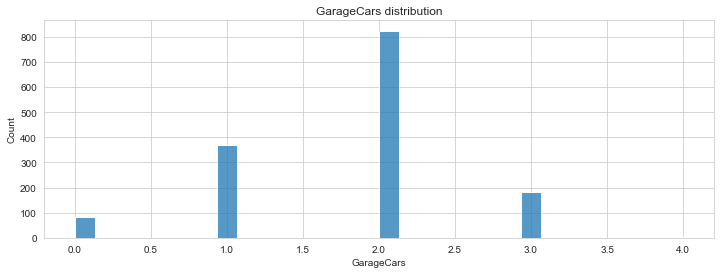

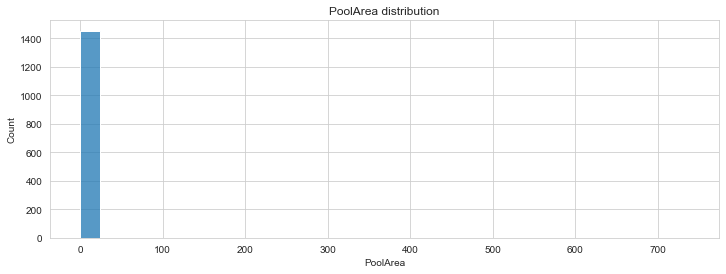

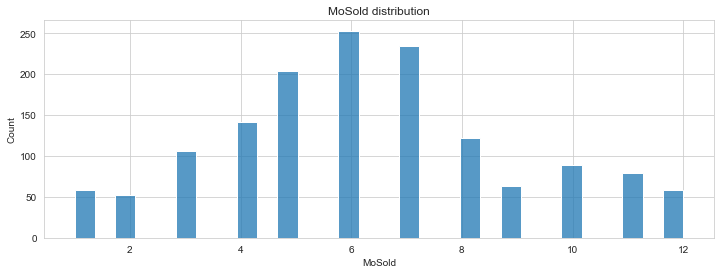

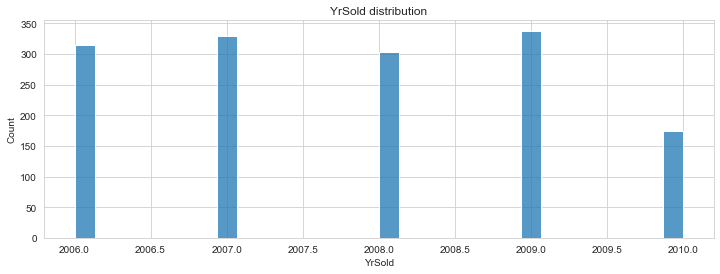

In [15]:
for ax in train[numerical_cat_features]:
    plt.figure(figsize=(12, 4))
    sns.histplot(x=train[ax], bins=30)
    plt.title(f'{ax} distribution')

In [16]:
# categorical feature distribution represented in boxplots

<AxesSubplot:>

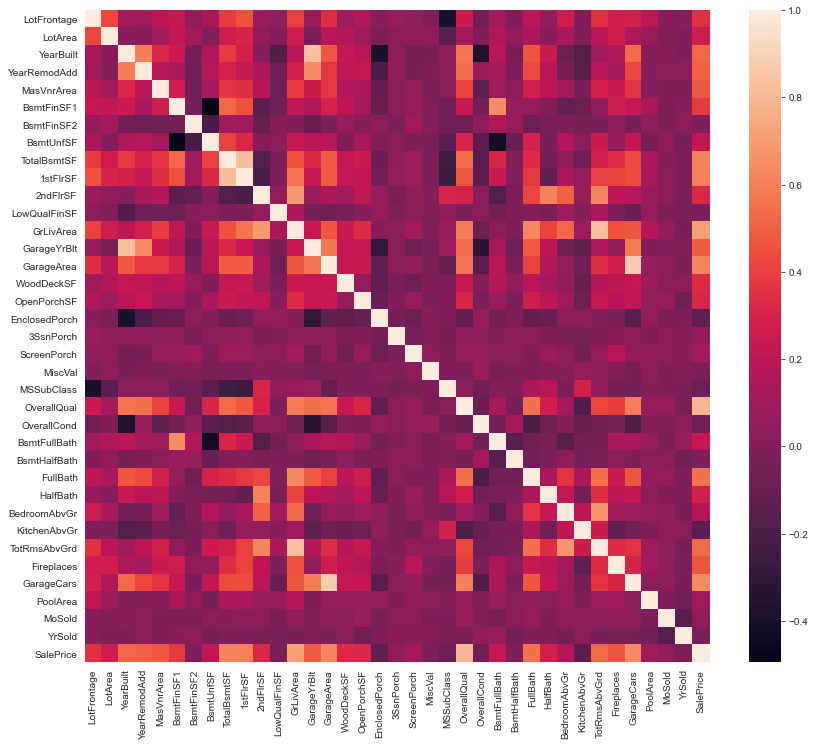

In [17]:
numerical_cols_w_price = numerical_cols + ['SalePrice']

plt.figure(figsize=(14, 12))
sns.heatmap(train[numerical_cols_w_price].corr())

# **Data Cleaning**

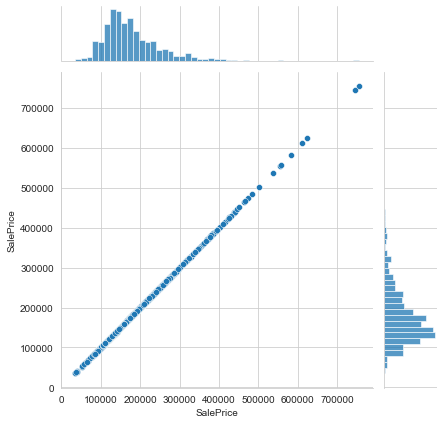

In [18]:
sns.jointplot(x=train['SalePrice'], y=train['SalePrice'])

In [19]:
# method to drop sale price outlier indexes (z score >= 3)

def drop_price_outliers(df):
    i = 0
    drop_indexes = []
    for value in df['SalePrice']:
        if abs((value - df['SalePrice'].mean()) / df['SalePrice'].std()) >= 3:
            drop_indexes.append(i)
        i += 1
    return df.drop(index=drop_indexes).reset_index()

In [20]:
train = drop_price_outliers(train)

In [21]:
# method to fill numerical cols with sparse data

def fill_sparse_num_cols(df):
    for col in df[numerical_cols]:
        if (df[col].isnull().sum() / len(df[col]) * 100) > 0:
            df[col] = df[col].fillna(value=round(df[col].mean(), 0))

In [22]:
fill_sparse_num_cols(train)
fill_sparse_num_cols(test)

In [23]:
# method to impute values to the features mean with a z score >= 3

pd.options.mode.chained_assignment = None

def impute_num_outliers(df):
    z_score_dic = {}
    i = 1    
    for col in df[numerical_cont_features]:
        for value in df[col]:
            if abs((value - df[col].mean()) / df[col].std()) >= 3 and \
            col not in z_score_dic.keys():
                z_score_dic[col] = [i - 1]
            elif abs((value - df[col].mean()) / df[col].std()) >= 3 and \
            col in z_score_dic.keys():
                z_score_dic[col].append(i - 1)
            i += 1
            if i > len(df[col]):
                i = 1
    for key in z_score_dic.keys():
        for value in z_score_dic[key]:
            df[key][value] = round(df[key].mean(), 2)
    return df

In [24]:
train = impute_num_outliers(train)
test = impute_num_outliers(test)

In [25]:
# method to drop cols with > 45% missing data

def drop_sparse_cat_cols(df):
    drop_cols = []
    for col in df[categorical_features]:
        if ((df[col].isnull().sum() / len(df[col])) * 100) > 45:
            drop_cols.append(col)
    return df.drop(labels=drop_cols, axis=1)

In [26]:
train = drop_sparse_cat_cols(train)
test = drop_sparse_cat_cols(test)

In [27]:
# method to fill missing categorical features with missing object

updated_cat_features = [col for col in train.drop('SalePrice', axis=1) if \
                        train[col].dtype in ['object']]

def fill_missing_cat_cols(df):
    for col in df[updated_cat_features]:
        df[col].fillna(value='Missing', inplace=True)
    return df

In [28]:
train = fill_missing_cat_cols(train)
test = fill_missing_cat_cols(test)

# **Feature Engineering / Scaling**

In [29]:
# method to transform categorical data to discrete vars via label encoder

def labeling(df):    
    for col in df[updated_cat_features]:
        le = LabelEncoder()
        temp = le.fit_transform(df[col])
        df[f'{col}_labels'] = temp
        df = df.drop(labels=col, axis=1)
    if 'index' in df.columns:
        df = df.drop(labels='index', axis=1)
    return df

In [30]:
train = labeling(train)
test = labeling(test)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

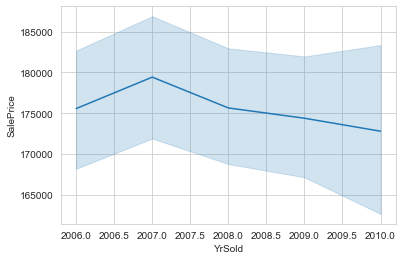

In [31]:
sns.lineplot(x=train['YrSold'], y=train['SalePrice'])

In [32]:
temporal_features = [col for col in train if 'Year' in col or 'Yr' in col]

In [33]:
# method to reassign temporal attributes with respect to year sold (dropping year sold)

def reassign_temporals(df):
    for col in df[temporal_features]:
        if col != 'YrSold':
            df[col] = df['YrSold'] - df[col]
    return df.drop(labels='YrSold', axis=1)

In [34]:
train = reassign_temporals(train)
test = reassign_temporals(test)

In [35]:
# method to normalize data via min max scaler w/ target var

train_cols = [col for col in train if col != 'Id']
test_cols = [col for col in test if col != 'Id']

def normalize(df):
    if len(df.columns) == 75:
        cols = train_cols
    else:
        cols = test_cols
    scaler = MinMaxScaler()
    return pd.DataFrame(data=scaler.fit_transform(df[cols]), columns=cols)

In [36]:
# train_cols = [col for col in train if col not in ['Id', 'SalePrice']]
# test_cols = [col for col in test if col != 'Id']

# def normalize(df):
#     scaler = MinMaxScaler()
#     if len(df.columns) == 75:
#         df1 = pd.DataFrame(data=scaler.fit_transform(df[train_cols]), columns=train_cols)
#         df1['SalePrice'] = df['SalePrice']
#         return df1
#     else:
#         return pd.DataFrame(data=scaler.fit_transform(df[test_cols]), columns=test_cols)
    

In [37]:
train_normal = normalize(train)
test_normal = normalize(test)

In [38]:
# method to standardize data via standard scaler w/ target var

def standardize(df):
    if len(df.columns) == 75:
        cols = train_cols
    else:
        cols = test_cols
    scaler = StandardScaler()
    return pd.DataFrame(data=scaler.fit_transform(df[cols]), columns=cols)

In [39]:
# def standardize(df):
#     scaler = StandardScaler()
#     if len(df.columns) == 75:
#         df1 = pd.DataFrame(data=scaler.fit_transform(df[train_cols]), columns=train_cols)
#         df1['SalePrice'] = df['SalePrice']
#         return df1
#     else:
#         return pd.DataFrame(data=scaler.fit_transform(df[test_cols]), columns=test_cols)

In [40]:
train_standard = standardize(train)
test_standard = standardize(test)

# **Feature Selection**

In [41]:
# feature selection on normalized data

X_train_normal = train_normal.drop('SalePrice', axis=1)
y_train_normal = train_normal['SalePrice']

feature_selection_normal = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_selection_normal.fit(X_train_normal, y_train_normal)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [42]:
selected_feat_normal = X_train_normal.columns[(feature_selection_normal.get_support())]
X_train_normal_selected = X_train_normal[selected_feat_normal]

In [43]:
# feature selection on standardized data

X_train_standard = train_standard.drop('SalePrice', axis=1)
y_train_standard = train_standard['SalePrice']

feature_selection_standard = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_selection_standard.fit(X_train_standard, y_train_standard)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [44]:
selected_feat_standard = X_train_standard.columns[(feature_selection_standard.get_support())]
X_train_standard_selected = X_train_standard[selected_feat_standard]

In [45]:
count = len(X_train_normal_selected.columns)
for col in X_train_normal_selected.columns:
    if col in X_train_standard_selected.columns:
        count -= 1
print(f'{count} -> same selected cols')

0 -> same selected cols


# **Modelling Neural Nets**

In [46]:
# train test split overriding normal and standard scaled vars

X_train_normal, X_test_normal, y_train_normal, y_test_normal = \
train_test_split(X_train_normal_selected, y_train_normal, test_size=0.2, random_state=0)

X_train_standard, X_test_standard, y_train_standard, y_test_standard = \
train_test_split(X_train_standard_selected, y_train_standard, test_size=0.2, random_state=0)

In [47]:
# configuring neural net w/ adam optimizer for normalized data

# 33 33 1 best

model_normal = Sequential()

model_normal.add(Dense(33, activation='relu'))
model_normal.add(Dropout(0.2))

model_normal.add(Dense(33, activation='relu'))
model_normal.add(Dropout(0.2))

model_normal.add(Dense(1))

model_normal.compile(optimizer='adam', loss='mse')

In [48]:
model_normal.fit(x=X_train_normal, y=y_train_normal, validation_data=(X_test_normal, \
                                                                      y_test_normal), \
          batch_size=128, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 19ms/step - loss: 0.1353 - val_loss: 0.0523
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0740 - val_loss: 0.0342
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0547 - val_loss: 0.0251
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0456 - val_loss: 0.0213
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0374 - val_loss: 0.0160
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0339 - val_loss: 0.0136
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0292 - val_loss: 0.0123
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0283 - val_loss: 0.0100
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0243 - val_loss: 0.0106
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.0104
Epoch 11/100
9/9 [==========

<AxesSubplot:>

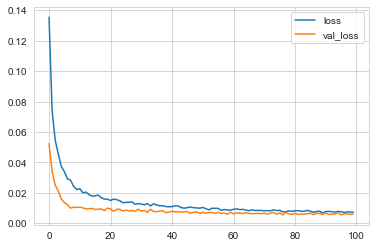

In [49]:
normal_losses = pd.DataFrame(model_normal.history.history)
normal_losses.plot()

In [50]:
normal_predictions = model_normal.predict(X_test_normal)

In [51]:
mean_absolute_error(y_test_normal, normal_predictions)

0.054884360017891126

In [52]:
np.sqrt(mean_squared_error(y_test_normal, normal_predictions))

0.07872164979893682

In [53]:
explained_variance_score(y_test_normal, normal_predictions)

0.8412406475412091

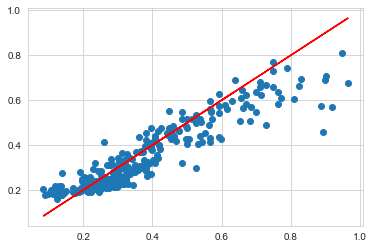

In [54]:
plt.scatter(y_test_normal, normal_predictions)
plt.plot(y_test_normal, y_test_normal, 'r')

In [55]:
# configuring neural net w/ adam optimizer for standardized data

# 33 33 1 best

model_standard = Sequential()

model_standard.add(Dense(33, activation='relu'))
model_standard.add(Dropout(0.2))

model_standard.add(Dense(33, activation='relu'))
model_standard.add(Dropout(0.2))

model_standard.add(Dense(1))

model_standard.compile(optimizer='adam', loss='mse')

In [56]:
model_standard.fit(x=X_train_standard, y=y_train_standard, validation_data=(X_test_standard, \
                                                                      y_test_standard), \
          batch_size=128, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 16ms/step - loss: 1.2218 - val_loss: 0.6603
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8315 - val_loss: 0.3434
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5968 - val_loss: 0.2691
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5301 - val_loss: 0.2488
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4791 - val_loss: 0.2309
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4046 - val_loss: 0.2138
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3954 - val_loss: 0.2011
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4167 - val_loss: 0.2000
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3740 - val_loss: 0.1949
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3390 - val_loss: 0.1867
Epoch 11/100
9/9 [==========

<AxesSubplot:>

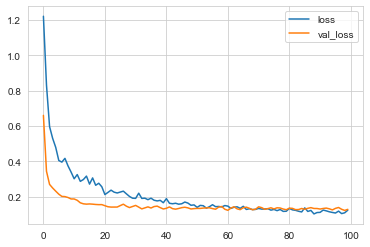

In [57]:
standard_losses = pd.DataFrame(model_standard.history.history)
standard_losses.plot()

In [58]:
standard_predictions = model_standard.predict(X_test_standard)

In [59]:
mean_absolute_error(y_test_standard, standard_predictions)

0.24173186557614557

In [60]:
np.sqrt(mean_squared_error(y_test_standard, standard_predictions))

0.3575448254640191

In [61]:
explained_variance_score(y_test_standard, standard_predictions)

0.8870123453564851

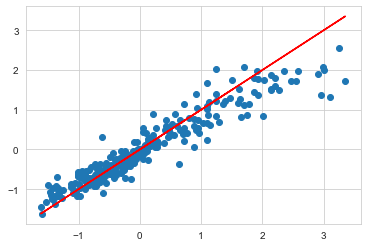

In [62]:
plt.scatter(y_test_standard, standard_predictions)
plt.plot(y_test_standard, y_test_standard, 'r')

In [63]:
# TODO: neural net on full data set (maybe)
# TODO: neural net on pca of standardized data (non-lasso-selected?) (maybe)

In [64]:
# modelling neural net for all cols

X_train_standard = train_standard.drop('SalePrice', axis=1)
y_train_standard = train_standard['SalePrice']

X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(X_train_standard, \
                                                                            y_train_standard, \
                                                                            test_size=0.2, \
                                                                            random_state=0)

In [65]:
# configuring neural net w/ adam optimizer for standardized non-selected data

# rmse:
# 147 77 39 .0642
# 147 147 77 39 1 .0648
# 147 77 77 1 .0706
# 147 147 77 .0731
# 147 77 77 .0741
# 147 147 1 .0777

model_stand = Sequential()

model_stand.add(Dense(147, activation='relu'))
model_stand.add(Dropout(0.2))

# model_stand.add(Dense(147, activation='relu'))
# model_stand.add(Dropout(0.2))

model_stand.add(Dense(77, activation='relu'))
model_stand.add(Dropout(0.2))

model_stand.add(Dense(39, activation='relu'))
model_stand.add(Dropout(0.2))

model_stand.add(Dense(1))

model_stand.compile(optimizer='adam', loss='mse')

In [66]:
model_stand.fit(x=X_train_stand, y=y_train_stand, validation_data=(X_test_stand, \
                                                                      y_test_stand), \
          batch_size=128, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 18ms/step - loss: 0.8462 - val_loss: 0.3582
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.4516 - val_loss: 0.2216
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3519 - val_loss: 0.2334
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.3193 - val_loss: 0.2155
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2602 - val_loss: 0.1810
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2498 - val_loss: 0.1775
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.2220 - val_loss: 0.1788
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2100 - val_loss: 0.1741
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2102 - val_loss: 0.1702
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2067 - val_loss: 0.1711
Epoch 11/100
9/9 [==========

<AxesSubplot:>

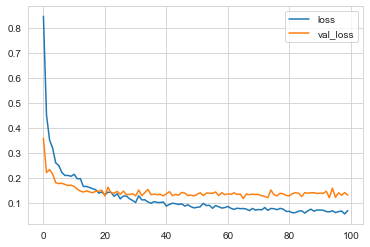

In [67]:
stand_losses = pd.DataFrame(model_stand.history.history)
stand_losses.plot()

In [68]:
stand_predictions = model_stand.predict(X_test_stand)

In [69]:
mean_absolute_error(y_test_stand, stand_predictions)

0.2528513299851795

In [70]:
np.sqrt(mean_squared_error(y_test_stand, stand_predictions))

0.36256629216467884

In [71]:
explained_variance_score(y_test_stand, stand_predictions)

0.8807082761768282

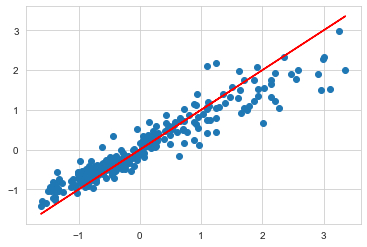

In [72]:
plt.scatter(y_test_stand, stand_predictions)
plt.plot(y_test_stand, y_test_stand, 'r')

In [73]:
# TODO: inverse scale predictions

temp_train = train.drop('SalePrice', axis=1)
temp_train['SalePrice'] = train['SalePrice']

scaler = StandardScaler()
scaler.fit(temp_train.drop(labels='Id', axis=1))

StandardScaler()

In [74]:
temp = X_test_stand.copy()
temp['Predictions'] = stand_predictions

In [75]:
temp_trans = pd.DataFrame(scaler.inverse_transform(temp), columns=temp.columns)

In [76]:
corrected_stand_pred = temp_trans['Predictions'].to_numpy()

In [77]:
temp_corrected_test = X_test_stand.copy()
temp_corrected_test['y_test'] = y_test_stand.to_numpy()

In [78]:
temp_trans_test = pd.DataFrame(scaler.inverse_transform(temp_corrected_test),
                                   columns=temp_corrected_test.columns)

In [79]:
corrected_stand_test = temp_trans_test['y_test'].to_numpy()

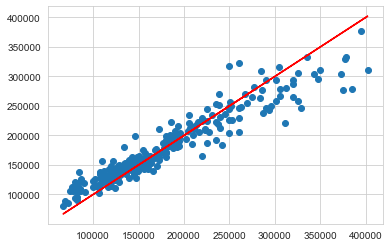

In [80]:
plt.scatter(corrected_stand_test, corrected_stand_pred)
plt.plot(corrected_stand_test, corrected_stand_test, 'r')

In [81]:
# inverse scaling working properly, make test predictions and apply inverse transformation

In [82]:
scaled_predictions = model_stand.predict(test_standard)

In [83]:
temp = test_standard.copy()
temp['Predictions'] = scaled_predictions

In [84]:
temp_predictions = pd.DataFrame(scaler.inverse_transform(temp), columns=temp.columns)

In [85]:
predictions_array = temp_predictions['Predictions'].to_numpy()

In [86]:
predictions = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions_array})

In [87]:
predictions.tail()

,Id,SalePrice
1454,2915,109484.807776
1455,2916,99962.820805
1456,2917,158730.260232
1457,2918,139104.945553
1458,2919,241892.581487


In [88]:
sample_sumbission = pd.read_csv('sample_submission.csv')
sample_sumbission.shape

(1459, 2)

In [89]:
predictions.shape

(1459, 2)

In [90]:
predictions.to_csv('submission.csv', index=False)